In [1]:
import numpy as np
from session_data import *
import matplotlib.pyplot as plt
import sys

In [2]:
mouse_id = "7001"
session_id = "v7"
experiment = "clickbait-visual"

print("=== Testing SessionData Class ===")
print(f"Loading data for {mouse_id}_{session_id}...")
    

data = SessionData(
    mouse_id=mouse_id,
    session_id=session_id,
    experiment=experiment,
    #base_path="S:\\clickbait-visual\\kilosorted",  # Adjust path as needed
    min_spikes=50,
    verbose=True)

=== Testing SessionData Class ===
Loading data for 7001_v7...
Successfully loaded spike_times from S:\clickbait-visual\kilosorted\7001\v7\spike_times.npy
Successfully loaded spike_templates from S:\clickbait-visual\kilosorted\7001\v7\spike_templates.npy
Successfully loaded templates from S:\clickbait-visual\kilosorted\7001\v7\templates.npy
Successfully loaded sniff from S:\clickbait-visual\preprocessed\7001\v7\sniff.npy
Loaded data: ['spike_times', 'spike_templates', 'templates', 'sniff']
Loaded 34 clusters for 7001_v7
Loaded sniff data: 3647040 samples


Created population matrix: 34 neurons x 40 time bins
Time range: 2000000.0 - 2002000.0 ms
Bin size: 50 ms


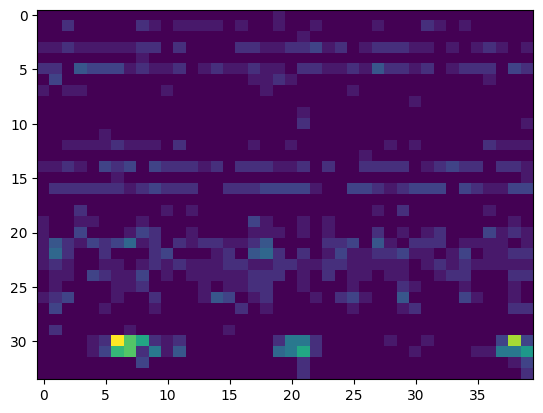

In [3]:
start_time=1000*2000
end_time=start_time+2000 
bin_size_ms=50

pop_matrix, time_bins, included_clusters = data.create_population_raster(
    start_time=start_time,
    end_time=end_time, 
    bin_size_ms=bin_size_ms,
    zscore_neurons=False,
    cluster_ids=None
)

plt.imshow(pop_matrix, aspect='auto')

In [4]:
my_list = [1, 2, 3, 4, 5]
size = sys.getsizeof(my_list)
print(f"Size: {size} bytes")

Size: 104 bytes


In [5]:
ttls = np.load(r"S:\clickbait-visual\preprocessed\7001\v7\ttls.npy")

In [6]:
len(ttls)/30

3647040.0

In [7]:
len(data.sniff)

3647040

In [8]:
size = sys.getsizeof(data)
print(f"Size: {size} bytes")

Size: 56 bytes


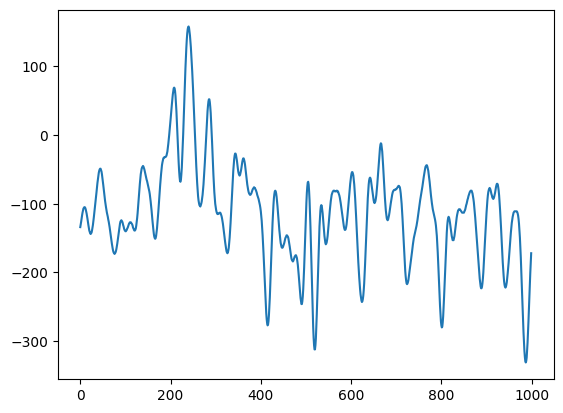

In [9]:
plt.plot(data.sniff[start_time+2000:start_time+3000:1])

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=5)

scaled_data = scaler.fit_transform(pop_matrix[:,:])
scores = pca.fit_transform(scaled_data.T)

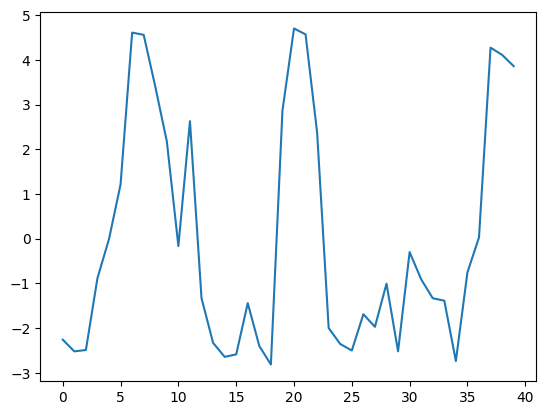

In [11]:
plt.plot(scores[:,0])

In [12]:
hc_clusters = data.filter_clusters('best_channel <= 16')
ob_clusters = data.filter_clusters('best_channel > 16')

Filtered from 34 to 22 clusters using: best_channel <= 16
Filtered from 34 to 12 clusters using: best_channel > 16


In [13]:
from sklearn.cross_decomposition import CCA

hc_pop_matrix, hc_time_bins, hc_included_clusters = hc_clusters.create_population_raster(
    start_time=1000*2000,           # Start at 0 ms
    end_time=1000*2000+30000,         # End at 10 seconds (10000 ms)
    bin_size_ms=100,        # 100 ms bins
    zscore_neurons=False,    # Apply z-scoring
    cluster_ids=None        # Use all clusters
)

ob_pop_matrix, ob_time_bins, ob_included_clusters = ob_clusters.create_population_raster(
    start_time=1000*2000,           # Start at 0 ms
    end_time=1000*2000+30000,         # End at 10 seconds (10000 ms)
    bin_size_ms=100,        # 100 ms bins
    zscore_neurons=False,    # Apply z-scoring
    cluster_ids=None        # Use all clusters
)

X = hc_pop_matrix.T  # Shape: (time_bins, neurons)
Y = ob_pop_matrix.T  # Shape: (time_bins, neurons)

cca = CCA(n_components=3)  # Number of canonical components
X_c, Y_c = cca.fit_transform(X, Y)

Created population matrix: 22 neurons x 300 time bins
Time range: 2000000.0 - 2030000.0 ms
Bin size: 100 ms
Created population matrix: 12 neurons x 300 time bins
Time range: 2000000.0 - 2030000.0 ms
Bin size: 100 ms


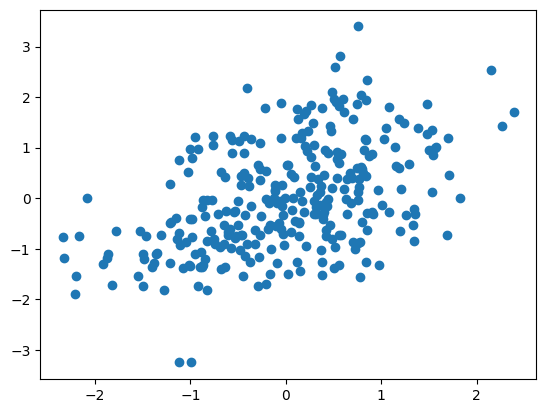

In [14]:
plt.scatter(X_c[:,2], Y_c[:,2])

In [18]:
data.clusters[0]['spike_times'][-10:]

array([3645347.23333333, 3645358.6       , 3645359.86666667,
       3645360.16666667, 3645360.5       , 3645372.66666667,
       3646069.8       , 3646915.9       , 3646916.96666667,
       3646992.83333333])

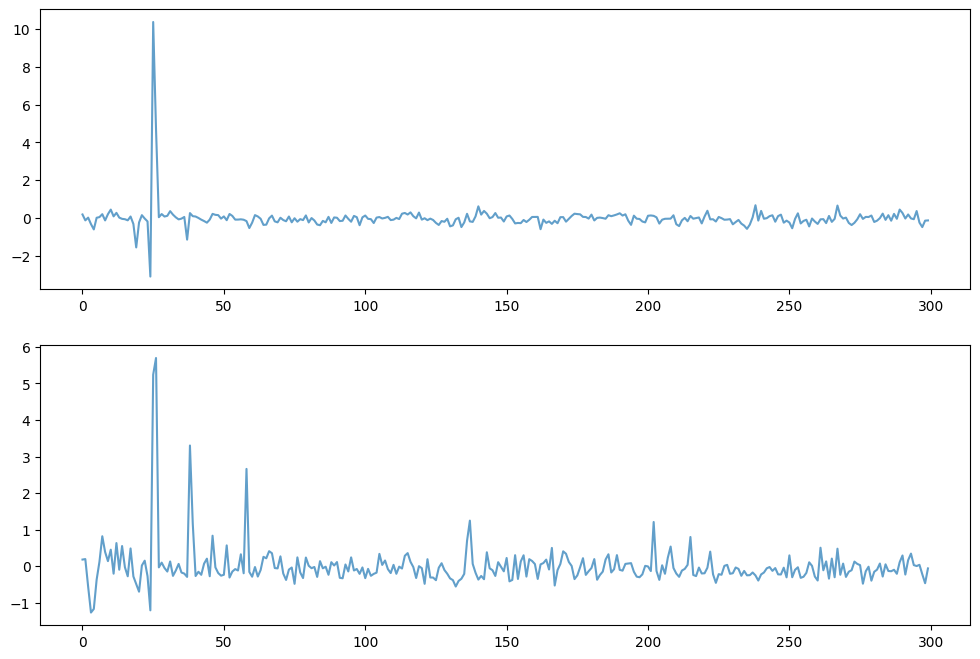

In [15]:
# X_c and Y_c are your canonical components from CCA
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Plot first few canonical components for both datasets

axes[0].plot(X_c[:, 0], label=f'X_canonical_{0+1}', alpha=0.7)
axes[1].plot(Y_c[:, 0], label=f'Y_canonical_{0+1}', alpha=0.7)

In [16]:
data.events

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,reward_state,water_left,water_right,click,speed,direction,timestamp_ms
0,0,2025-04-10 13:21:27.540633600,False,False,760,355,44.0,False,True,False,False,False,0.000000,0.000000,8102
1,0,2025-04-10 13:21:27.567936000,False,False,779,362,44.0,False,True,False,False,False,20.248457,0.352990,8129
2,0,2025-04-10 13:21:27.589299200,False,False,780,362,44.0,False,True,False,False,False,1.000000,0.000000,8150
3,0,2025-04-10 13:21:27.623334400,False,False,779,363,44.0,False,True,False,False,False,1.414214,0.000015,8184
4,0,2025-04-10 13:21:27.656601600,False,False,778,362,44.0,False,True,False,False,False,1.414214,0.785398,8217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108812,9,2025-04-10 14:21:54.991705600,False,False,233,256,47.0,False,False,False,False,False,2.236068,0.463648,3635553
108813,9,2025-04-10 14:21:55.024307200,False,False,232,255,47.0,False,False,False,False,False,1.414214,0.785398,3635585
108814,9,2025-04-10 14:21:55.055859200,False,False,231,254,47.0,False,False,False,False,False,1.414214,0.785398,3635617
108815,9,2025-04-10 14:21:55.091315200,False,False,234,258,47.0,False,False,False,False,False,5.000000,0.927295,3635652


In [17]:
ob_clusters.events

,trial_number,timestamp,poke_left,poke_right,centroid_x,centroid_y,target_cell,iti,reward_state,water_left,water_right,click,speed,direction,timestamp_ms
0,0,2025-04-10 13:21:27.540633600,False,False,760,355,44.0,False,True,False,False,False,0.000000,0.000000,8102
1,0,2025-04-10 13:21:27.567936000,False,False,779,362,44.0,False,True,False,False,False,20.248457,0.352990,8129
2,0,2025-04-10 13:21:27.589299200,False,False,780,362,44.0,False,True,False,False,False,1.000000,0.000000,8150
3,0,2025-04-10 13:21:27.623334400,False,False,779,363,44.0,False,True,False,False,False,1.414214,0.000015,8184
4,0,2025-04-10 13:21:27.656601600,False,False,778,362,44.0,False,True,False,False,False,1.414214,0.785398,8217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108812,9,2025-04-10 14:21:54.991705600,False,False,233,256,47.0,False,False,False,False,False,2.236068,0.463648,3635553
108813,9,2025-04-10 14:21:55.024307200,False,False,232,255,47.0,False,False,False,False,False,1.414214,0.785398,3635585
108814,9,2025-04-10 14:21:55.055859200,False,False,231,254,47.0,False,False,False,False,False,1.414214,0.785398,3635617
108815,9,2025-04-10 14:21:55.091315200,False,False,234,258,47.0,False,False,False,False,False,5.000000,0.927295,3635652
